In [1]:
suppressMessages(library("mc2d"))
library("scales")
library("ggplot2")
library("gridExtra")

# Risk Study for REPLACE ME

See the [ISO 27005 Risk Cookbook](http://www.businessofsecurity.com/docs/FAIR%20-%20ISO_IEC_27005%20Cookbook.pdf)
for a more detailed explanation of this template.

# Asset

Define the asset or assets at risk

# Threat Community

Explain the threat community. This should include where they operate, how effective they are, and any additional details that help understand them.

## Threat Capability

Define the ability for the threat agent to overcome the controls. The guideline for values here are as follows:

|Rating                |Value |
|----------------------|------|
|Very High (Top 2%)    |98-100|
|High (Top 16%)        |84-97 |
|Moderate              |17-84 |
|Low (Bottom 16%)      |3-16  |
|Very Low (Bottom 2%)  |0-2   |

In [2]:
tcap.min    <- 0
tcap.likely <- 50
tcap.max    <- 100
tcap.confidence <- 10

# Controls

Define the controls that resist the threat community. Provide any necessary links and descriptions.

## Control Strength

Define the ability of the controls in play to overcome the threat agents.

|Rating                |Value |
|----------------------|------|
|Very High (Top 2%)    |98-100|
|High (Top 16%)        |84-97 |
|Moderate              |17-84 |
|Low (Bottom 16%)      |3-16  |
|Very Low (Bottom 2%)  |0-2   |

In [3]:
cs.min    <- 0
cs.likely <- 50
cs.max    <- 100
cs.confidence <- 10

# Threat Event Frequency

Threat Event Frequency. Number assumes an annual value. Example values
are as follows:

|Rating   |Value |
|---------|------|
|Very High|> 100 |
|High     |10-100|
|Moderate |1-10  |
|Low      |> .1  |
|Very Low |< .1  |

In [4]:
tef <- .25

# Loss Magnitude

Define the types of loss that could occur during a loss event for this study.

|Primary        |ISO/IEC 27005 Direct Operational Impacts                                  |
|:--------------|:-------------------------------------------------------------------------|
|Productivity   |The financial replacement value of lost (part of) asset                   |
|Response       |The cost of acquisition, configuration, and installation of the new asset |
|Replacement    |The cost of suspended operations due to the incident                      |
|               |Impact results in an information security breach                          |

|Secondary               |ISO/IEC 27005 Indirect Operational Impacts                               |
|:-----------------------|:------------------------------------------------------------------------|
|Competitive Advantage   |Opportunity cost                                                         |
|Fines/Judgments         |Legal or regulatory actions levied against an organization including bail|
|Reputation              |Potential misuse of information obtained through a security breach       |
|                        |Violation of statutory or regulatory obligations                         |
|                        |Violation of ethical codes of conduct                                    |

## Probable Loss

Set the probable amount for a single loss event. This is a combination in dollars of both the primary and secondary loss factors.

In [5]:
loss.probable <- 100000

## Worst Case Loss

Set the worst case amount a single loss event. This is a combination in dollars of both the primary and secondary loss factors

In [6]:
loss.worstCase <- 1000000

# Qualified risk based on loss tolerance

In [7]:
loss.veryHigh <- 10000000
loss.high <- 1000000
loss.moderate <- 100000
loss.low <- 50000
loss.veryLow <- 10000

# Generate distribution of samples

In [8]:
sampleSize <- 100000
cs <- rpert(sampleSize, cs.min, cs.likely, cs.max, cs.confidence)
tcap <- rpert(sampleSize, tcap.min, tcap.likely, tcap.max, tcap.confidence)

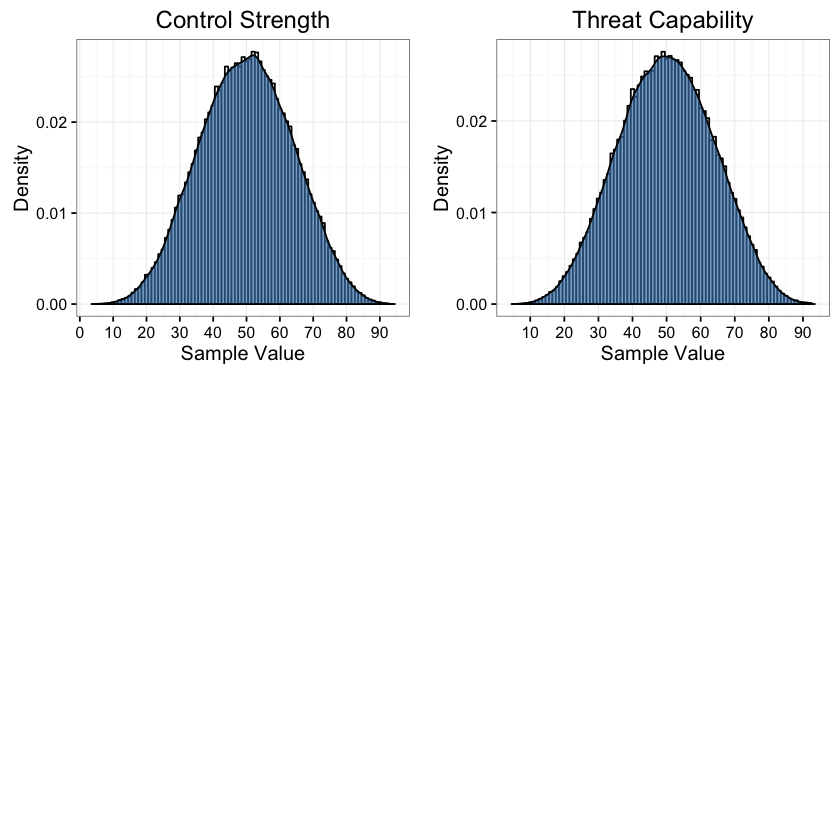

In [9]:
csPlot <- ggplot(data.frame(cs), aes(x = cs))
csPlot <- csPlot + geom_histogram(aes(y = ..density..), color="black",fill="white", binwidth=1)
csPlot <- csPlot + geom_density(fill="steelblue",alpha=2/3)
csPlot <- csPlot + theme_bw()
csPlot <- csPlot + labs(title="Control Strength", x="Sample Value", y="Density")
csPlot <- csPlot + scale_x_continuous(breaks=seq(0,100, by=10))

tcapPlot <- ggplot(data.frame(tcap), aes(x = tcap))
tcapPlot <- tcapPlot + geom_histogram(aes(y = ..density..), color="black",fill="white", binwidth=1)
tcapPlot <- tcapPlot + geom_density(fill="steelblue",alpha=2/3)
tcapPlot <- tcapPlot + theme_bw()
tcapPlot <- tcapPlot + labs(title="Threat Capability", x="Sample Value", y="Density")
tcapPlot <- tcapPlot + scale_x_continuous(breaks=seq(0,100, by=10))

grid.arrange(csPlot, tcapPlot, heights=4:5, ncol=2)

# Vulnerability Function

In [10]:
CalculateVulnerability <- function() {
    if (sampleSize < 100) {
        stop("Sample size needs to be at least 100 to get statistically significant results")
    }

    vulnerability <- 0

    for (i in 1:sampleSize) {
        if (tcap[i] > cs[i]) {
            vulnerability <- vulnerability + 1
        }
    }

    return(vulnerability / sampleSize)
}

# Loss Event Frequency Function

In [11]:
CalculateLossEventFrequency <- function() {
    return(CalculateVulnerability() * tef)
}

# Risk Function

In [12]:
CalculateRisk <- function(loss) {
    if (loss >= loss.veryHigh) {
        return("Very High")
    } else if (loss < loss.veryHigh && loss >= loss.high) {
        return("High")
    } else if (loss < loss.high && loss >= loss.moderate) {
        return("Moderate")
    } else if (loss < loss.moderate && loss >= loss.veryLow) {
        return("Low")
    } else {
        return("Very Low")
    }
}

# Annualized Loss Function

In [13]:
CalculateAnnualizedLoss <- function(lef, lm) {
    return(lm * lef)
}

# Calculate

In [14]:
lossEventFrequency <- CalculateLossEventFrequency()
worstCaseLoss <- CalculateAnnualizedLoss(lossEventFrequency, loss.worstCase)
probableLoss <- CalculateAnnualizedLoss(lossEventFrequency, loss.probable)
worstCaseRisk <- CalculateRisk(worstCaseLoss)
probableRisk <- CalculateRisk(probableLoss)

# Final Results

In [15]:
cat("Probable Risk:", probableRisk, dollar_format()(probableLoss), "\n")
cat("Worst Case Risk:", worstCaseRisk, dollar_format()(worstCaseLoss), "\n")

Probable Risk: Low $12,510 
Worst Case Risk: Moderate $125,100 


# Risk Treatments

Document any risk treatments that may come out of this study.